In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(readxl)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#Read Data, make class as factor
url <- "https://raw.githubusercontent.com/FarrelRamdhani/DSCI-100-Team-Project/blasius/Pumpkin_Seeds_Dataset.csv"
pumpkin_data <- read_csv(url)

pumpkin_data

Rows: 2500 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (12): Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [3]:
#Check The Quantity of each class

count_pumpkin <- group_by(pumpkin_data, Class) |>
                    summarize(count = n())

count_pumpkin

Class,count
<chr>,<int>
Çerçevelik,1300
Ürgüp Sivrisi,1200


In [4]:
# They are kinda equal, so it is good

In [13]:
# After doing some analysis with the data, we decide to go with parameter major axis, minor axis, eccentricity, roundness, aspect ration, compactness
# as our parameters, as it shows a really difference between the two clases.

pumpkin_data_select <- select(pumpkin_data, Major_Axis_Length, Minor_Axis_Length, Eccentricity, Roundness, Aspect_Ration, Compactness, Class) |>
    mutate(Class = as.factor(Class))

In [14]:
# Spliting the data 75:25
pumpkin_split <- initial_split(pumpkin_data_select, prop = 0.8 , strata = Class)  
train_pumpkin <- training(pumpkin_split)   
test_pumpkin <- testing(pumpkin_split)
train_pumpkin
test_pumpkin

Major_Axis_Length,Minor_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
326.1485,220.2388,0.7376,0.8963,1.4809,0.8207,Çerçevelik
417.1932,234.2289,0.8275,0.8440,1.7811,0.7487,Çerçevelik
435.8328,211.0457,0.8749,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮
507.2200,222.1872,0.8990,0.7549,2.2828,0.6599,Ürgüp Sivrisi
501.9065,204.7531,0.9130,0.7185,2.4513,0.6359,Ürgüp Sivrisi
462.8951,234.5597,0.8621,0.7933,1.9735,0.7104,Ürgüp Sivrisi


Major_Axis_Length,Minor_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
438.5827,242.8826,0.8327,0.8440,1.8057,0.7431,Çerçevelik
382.1808,205.6436,0.8429,0.8307,1.8585,0.7323,Çerçevelik
355.8436,210.4503,0.8064,0.8761,1.6909,0.7682,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮
520.2769,242.0064,0.8852,0.7757,2.1498,0.6811,Ürgüp Sivrisi
557.6689,259.8084,0.8848,0.7635,2.1465,0.6792,Ürgüp Sivrisi
456.9323,237.1540,0.8548,0.6515,1.9267,0.7167,Ürgüp Sivrisi


In [15]:
# Here are some plots that shows a really strong realtionship among all chosen parameters

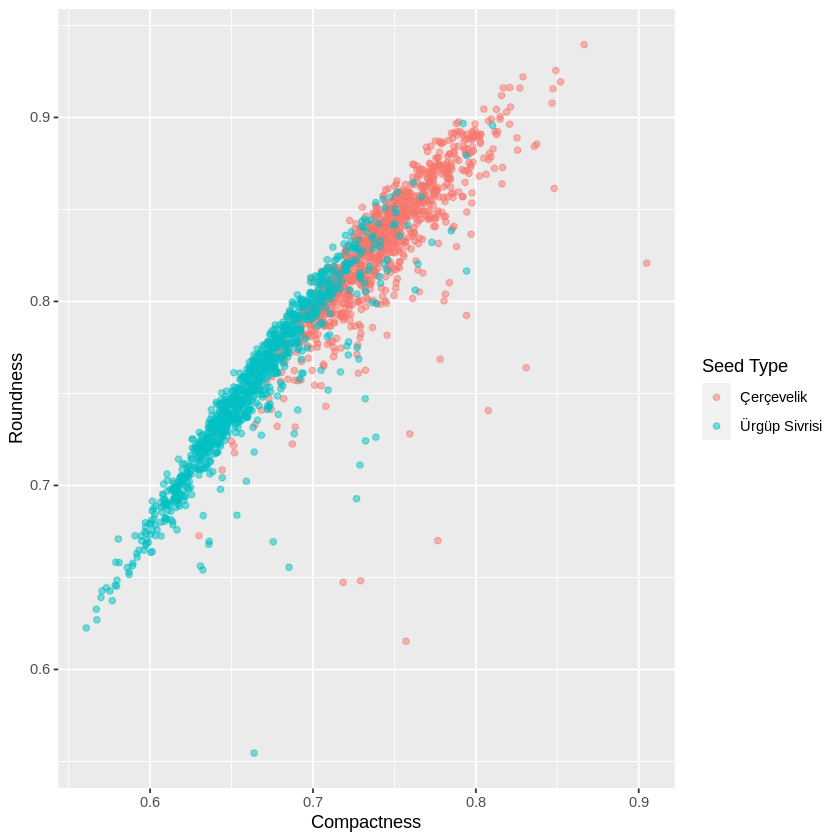

In [16]:
pumpkin_plot_1 <- ggplot(train_pumpkin, aes(x = Compactness, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Compactness", y = "Roundness", color = "Seed Type")

pumpkin_plot_1

In [17]:
# Equiv Diameter vs compactness plot also shows a good clustering

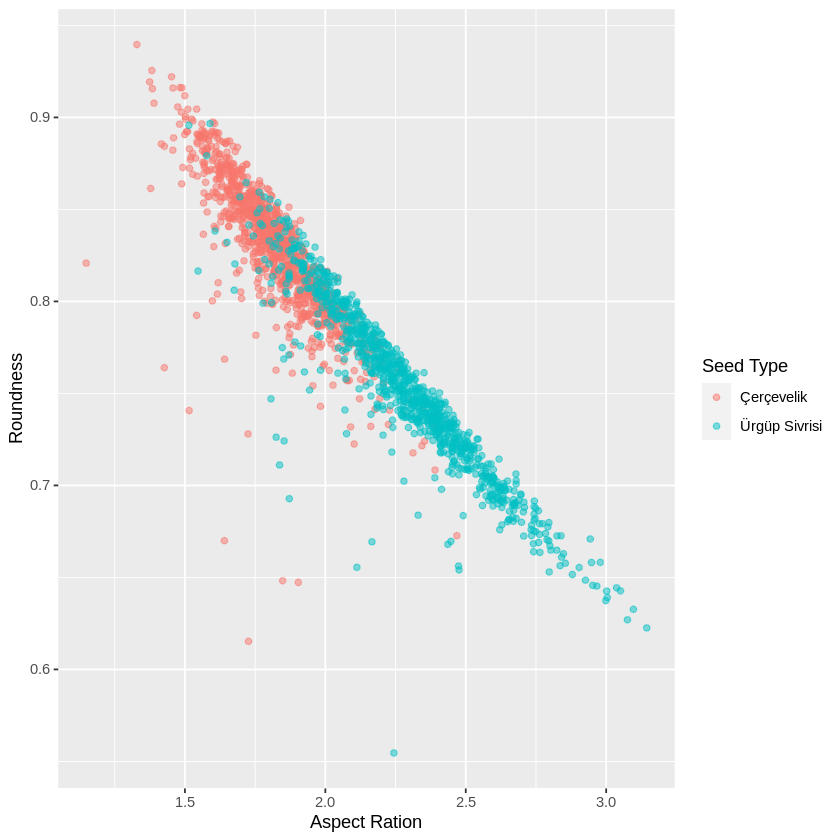

In [18]:
pumpkin_plot_2 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Roundness", color = "Seed Type")

pumpkin_plot_2

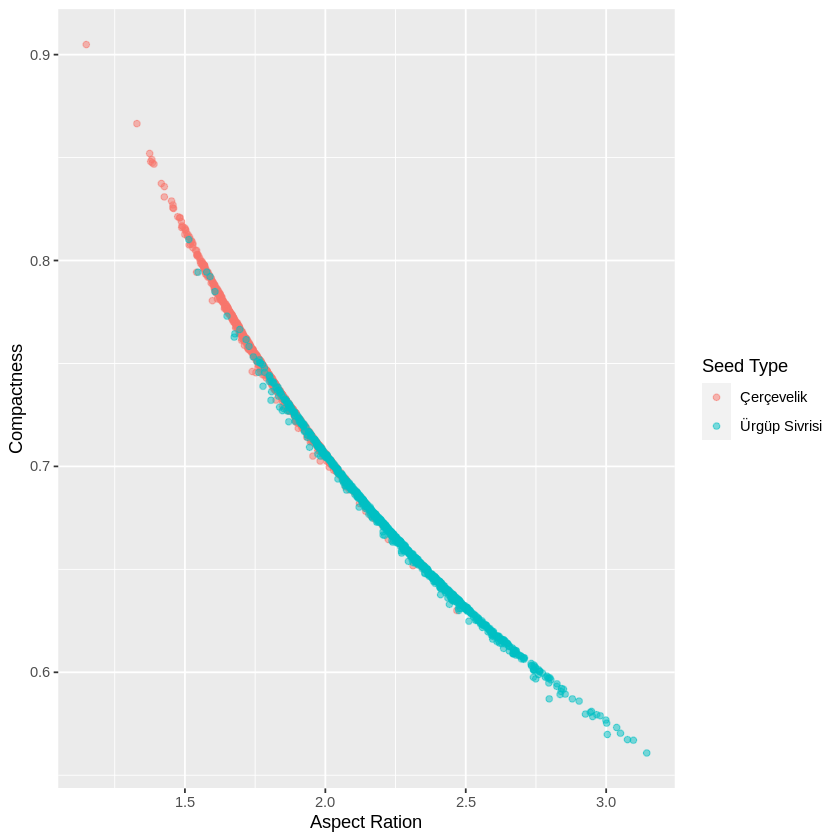

In [19]:
pumpkin_plot_2 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Compactness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Compactness", color = "Seed Type")

pumpkin_plot_2

In [20]:
# average, man mix
# 1 is Çerçevelik
# 2 is Ürgüp Sivrisi
#AVERAGE
Just_Çerçevelik_avg <- pumpkin_data |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(mean)


Just_ÇÜrgüp_Sivrisi_avg <- pumpkin_data |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(mean)


average_pumpkin <- bind_rows(Just_Çerçevelik_avg, Just_ÇÜrgüp_Sivrisi_avg) |>
                    bind_cols(tibble(Class = c(1,2)))

average_pumpkin
#MIN
Just_Çerçevelik_min <- pumpkin_data |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(min)


Just_ÇÜrgüp_Sivrisi_min <- pumpkin_data |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(min)
min_pumpkin <- bind_rows(Just_Çerçevelik_min, Just_ÇÜrgüp_Sivrisi_min) |>
                            bind_cols(tibble(Class = c(1,2)))

min_pumpkin
#MAX
Just_Çerçevelik_max <- pumpkin_data |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(max)


Just_ÇÜrgüp_Sivrisi_max <- pumpkin_data |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(max)

max_pumpkin <- bind_rows(Just_Çerçevelik_max, Just_ÇÜrgüp_Sivrisi_max)  |>
                        bind_cols(tibble(Class = c(1,2)))

max_pumpkin

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
78423.15,1089.522,426.2726,234.7769,79286.49,315.1933,0.8305382,0.9890799,0.7070178,0.8274985,1.822609,0.7411627,1
83079.54,1174.432,489.4585,216.0644,83914.81,323.8202,0.8937490,0.9899376,0.6782401,0.7525698,2.279054,0.6639915,2


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55811,888.242,320.8446,185.8440,56394,266.5723,0.4921,0.9542,0.5071,0.6153,1.1487,0.5884,1
47939,868.485,324.0113,152.1718,48366,247.0584,0.7507,0.9186,0.4680,0.5546,1.5138,0.5608,2


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
107476,1416.303,614.8959,305.8180,108536,369.9226,0.9360,0.9939,0.7814,0.9396,2.8410,0.9049,1
136574,1559.450,661.9113,297.7952,138384,417.0029,0.9481,0.9944,0.8296,0.8967,3.1444,0.8102,2


In [23]:
#Create the recipe
pumpkin_recipe <- recipe(Class ~ ., data = train_pumpkin) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

pumpkin_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          6

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [24]:
#Create the specification, with neighbors = tune()
pumpkin_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("classification")

In [25]:
#prepare 5 folds cross validation by making vfold, v = 5

pumpkin_vfold <- vfold_cv(train_pumpkin, v = 5, strata = Class)

In [26]:
#create a tibble, consist of values of k to predict

pumpkin_ks <- tibble(neighbors = seq(1,101,2))

In [27]:
#Create workflow, to combine everything,and aggregate the mean and standard error by using the collect_metrics function

knn_results <- workflow() |>
      add_recipe(pumpkin_recipe) |>
      add_model(pumpkin_tune) |>
      tune_grid(resamples = pumpkin_vfold, grid = pumpkin_ks) |>
      collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8410000,5,0.013383759,Preprocessor1_Model01
1,roc_auc,binary,0.8407452,5,0.013620175,Preprocessor1_Model01
3,accuracy,binary,0.8690000,5,0.009987492,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
99,roc_auc,binary,0.9375801,5,0.007746374,Preprocessor1_Model50
101,accuracy,binary,0.8715000,5,0.013430376,Preprocessor1_Model51
101,roc_auc,binary,0.9374149,5,0.007480891,Preprocessor1_Model51


In [29]:
#filter for accuracy

accuracies <- knn_results |> 
      filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8410,5,0.013383759,Preprocessor1_Model01
3,accuracy,binary,0.8690,5,0.009987492,Preprocessor1_Model02
5,accuracy,binary,0.8735,5,0.010416333,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
97,accuracy,binary,0.8720,5,0.01319091,Preprocessor1_Model49
99,accuracy,binary,0.8715,5,0.01343038,Preprocessor1_Model50
101,accuracy,binary,0.8715,5,0.01343038,Preprocessor1_Model51


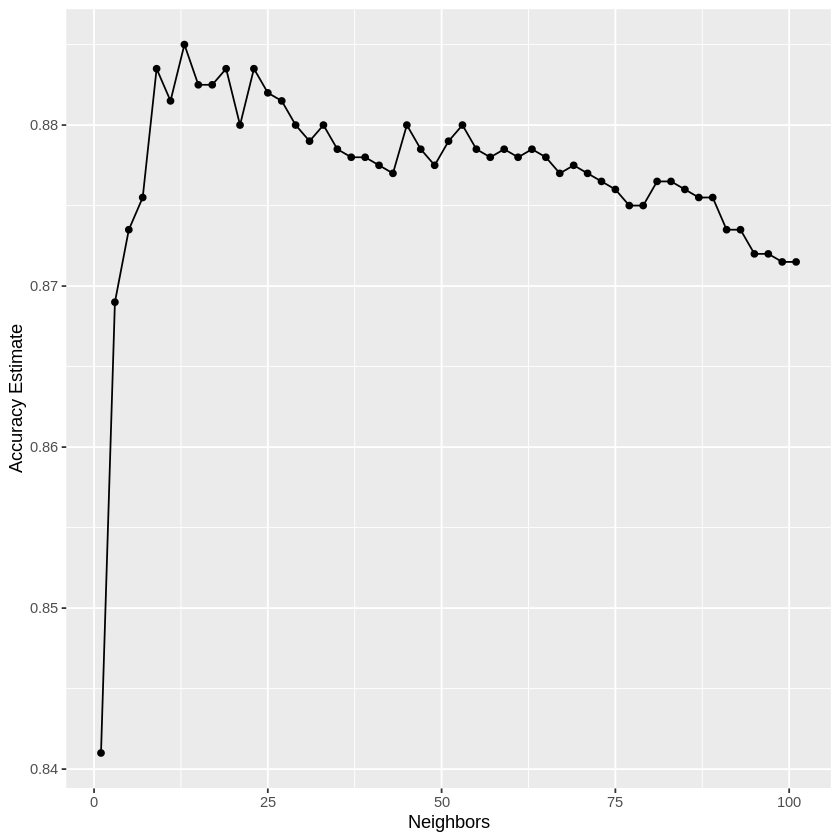

In [31]:
#create the plot for neighbors versus accuracy
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate")
      #scale_x_continuous(breaks = seq(0, 101, by = 1))  # adjusting the x-axis
      #scale_y_continuous(limits = c(0, 1.0)) # adjusting the y-axis
accuracy_versus_k

In [37]:
#find the row of the best value of k
best_k_row <- accuracies |>
    arrange(mean) |>
    tail(n = 1) 

best_k_row

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
13,accuracy,binary,0.885,5,0.0123996,Preprocessor1_Model07


In [38]:
#pull the value of k
best_k <- best_k_row |>
    pull(neighbors)
best_k

[1] 13

In [39]:
#create new spec with the best k
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
      set_engine("kknn") |>
      set_mode("classification")

In [40]:
#combine together the recipe and new spec
pumpkin_best_fit <- workflow() |>
      add_recipe(pumpkin_recipe) |>
      add_model(knn_best_spec) |>
      fit(data = train_pumpkin)
pumpkin_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(13,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.122
Best kernel: rectangular
Best k: 13

In [41]:
#use the model to predict the test data, and bind the prediction column to the test data
pumpkin_test_predictions <- predict(pumpkin_best_fit , test_pumpkin) |>
      bind_cols(test_pumpkin)
pumpkin_test_predictions

.pred_class,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Çerçevelik,438.5827,242.8826,0.8327,0.8440,1.8057,0.7431,Çerçevelik
Çerçevelik,382.1808,205.6436,0.8429,0.8307,1.8585,0.7323,Çerçevelik
Çerçevelik,355.8436,210.4503,0.8064,0.8761,1.6909,0.7682,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Ürgüp Sivrisi,520.2769,242.0064,0.8852,0.7757,2.1498,0.6811,Ürgüp Sivrisi
Ürgüp Sivrisi,557.6689,259.8084,0.8848,0.7635,2.1465,0.6792,Ürgüp Sivrisi
Ürgüp Sivrisi,456.9323,237.1540,0.8548,0.6515,1.9267,0.7167,Ürgüp Sivrisi


In [42]:
#Now let's see the accuracy
pumpkin_prediction_accuracy <- pumpkin_test_predictions |>
        metrics(truth = Class, estimate = .pred_class)   
pumpkin_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8740000
kap,binary,0.7473127


In [44]:
#Now we use the confusion matrix, This will show us the table of predicted labels and correct labels.
pumpkin_mat <- pumpkin_test_predictions |> 
      conf_mat(truth = Class, estimate = .pred_class)
pumpkin_mat

               Truth
Prediction      Çerçevelik Ürgüp Sivrisi
  Çerçevelik           232            35
  Ürgüp Sivrisi         28           205

In [65]:
#Count the percentage of accuracy for each class
Percentage_Çerçevelik <- 232/(232 + 28)
Percentage_Çerçevelik
Percentage_Ürgüp_Sivrisi <- 205 /(205+35)
Percentage_Ürgüp_Sivrisi

[1] 0.8923077

[1] 0.8541667

In [66]:
#Just now the manual way LOL

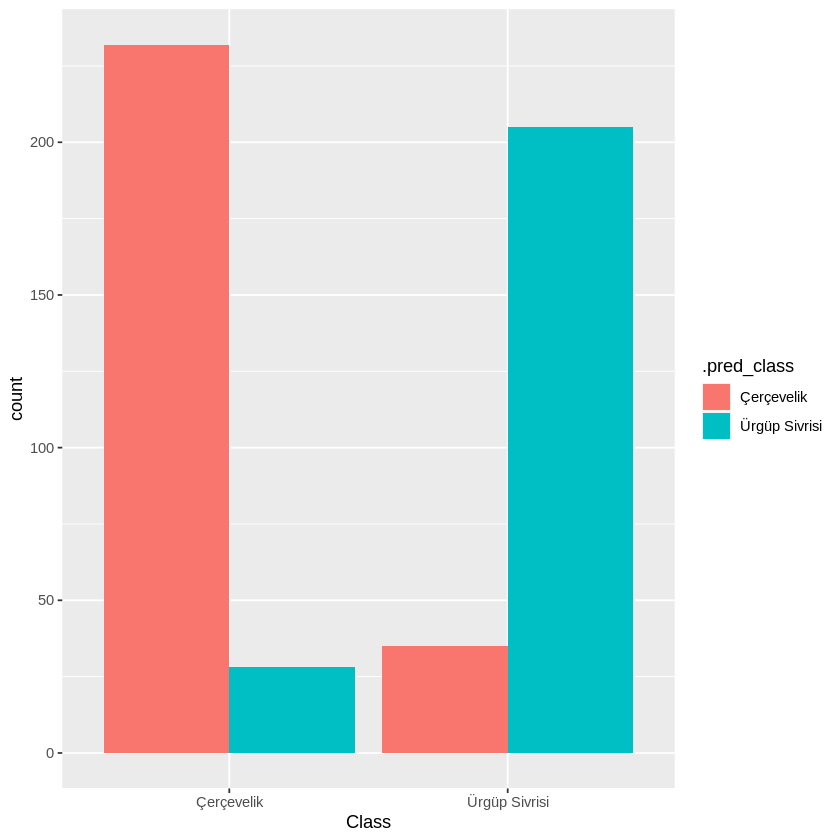

In [67]:
#Let's Create Bar graph to visualize the accuracy of model for each class
pumpkin_bar <- ggplot(pumpkin_test_predictions, aes(x = Class, fill = .pred_class)) +
                    geom_bar(position = "dodge") +
                    labs(x = "Class", color = "Prediction From Model")

pumpkin_bar